<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#Load-MNIST-Data" data-toc-modified-id="Load-MNIST-Data-2">Load MNIST Data</a></span></li><li><span><a href="#Function-to-add-noise" data-toc-modified-id="Function-to-add-noise-3">Function to add noise</a></span></li><li><span><a href="#Train-Neural-Network" data-toc-modified-id="Train-Neural-Network-4">Train Neural Network</a></span></li><li><span><a href="#Test-NN-on-different-values-of-y_noise" data-toc-modified-id="Test-NN-on-different-values-of-y_noise-5">Test NN on different values of y_noise</a></span></li><li><span><a href="#Retrain-NN-with-added-noise" data-toc-modified-id="Retrain-NN-with-added-noise-6">Retrain NN with added noise</a></span></li><li><span><a href="#Test-retrained-NN-on-different-values-of-y_noise" data-toc-modified-id="Test-retrained-NN-on-different-values-of-y_noise-7">Test retrained NN on different values of y_noise</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8">Conclusion</a></span></li></ul></div>

### Introduction

Author: SL

Last Edited: 27.10.2021

Link to this notebook on GitHub: https://github.com/SL023/MLforPhys/blob/main/Week3_MNIST_Image_Recognition.ipynb

This notebook explores how a simple neural network created in Tensorflow is affected by varying levels of noise added to the testing and training images taken from the MNIST dataset of handwritten digits from 0 to 9. 

In [1]:
# import relevant modules
import matplotlib.pyplot as plt
import numpy as np

# tensorFlow and tf.keras for neural network
import tensorflow as tf
from tensorflow import keras

# adjusting style of plots
import matplotlib.style
import matplotlib as mpl 

mpl.rcParams['figure.figsize'] = [4.0, 3.0] 
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

### Load MNIST Data

We first begin by loading the data from Keras, assigning this to appropriate training and testing variables for the images and labels, and exploring the shape and length of these variables. 

In [2]:
# load MNIST data 
mnist = keras.datasets.mnist   
# assign test and training images and labels
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# overview of shape and length training and testing data 
print("Shape of training images:",train_images.shape)
print("Length of training set labels:",len(train_labels))
print("First label:",train_labels[0])
print("Shape of testing images:",test_images.shape)
print("Length of testing set labels:",len(test_labels))

Shape of training images: (60000, 28, 28)
Length of training set labels: 60000
First label: 5
Shape of testing images: (10000, 28, 28)
Length of testing set labels: 10000


We can also display the first training image to get an overview of what the images look like with the default colormap. 

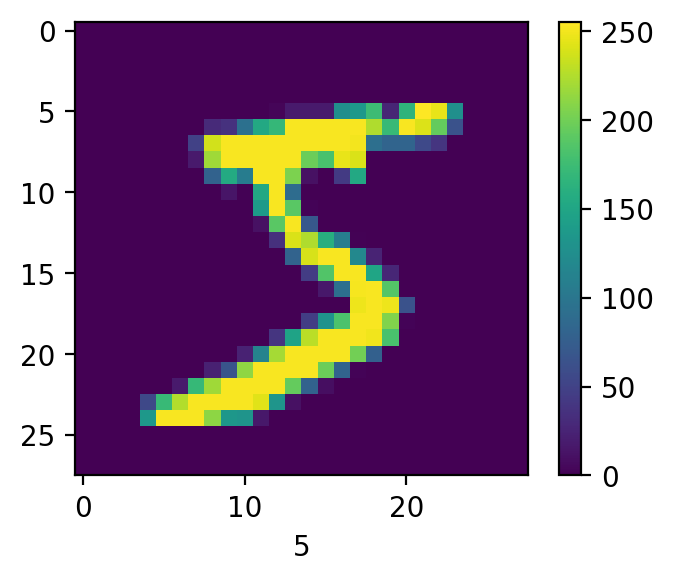

In [4]:
# display first training image and label 
plt.figure()
plt.imshow(train_images[0])
plt.xlabel(train_labels[0])
plt.colorbar()
plt.grid(False)
plt.show();

We need to normalise the RGB values (currently between 0-255) to 0-1 as follows:

In [5]:
# normalise RGB pixel values so they are between 0 and 1
train_images=train_images/255.0
test_images=test_images/255.0

### Function to add noise

Next, we write a function that adds random noise to MNIST images. 

For each pixel in the MNIST image the function adds a random noise contribution drawn from a uniform distribution from 0 to `y_noise` where `y_noise` is a configurable parameter.

In [6]:
def add_noise(data, sigma):
    '''
    function that adds noise to each pixel in MNIST images, 
    randomly drawn from a uniform distribution between 0 and sigma
    Inputs: 
        data: numpy array
        sigma: maximum range of uniform distribution from which noise is taken
    Output: 
        data + noise: numpy array with same shape as input data 
    '''
    noise = np.random.uniform(0, sigma, size=data.shape)
    return data + noise

We can use the function above to create a numpy array of the training images with added noise, the maximum value of which is set by the `y_noise` variable. The shape of this new array is the same as the original array. 

In [7]:
# initialise maximum value for noise
y_noise = 2
# implement function defined above to add noise to training images
train_images_with_noise = np.asarray(add_noise(train_images, y_noise))

In [8]:
# check shape of original and noisy training images 
print("Shape of training images:",train_images.shape)
print("Shape of training images with noise:",train_images_with_noise.shape)

Shape of training images: (60000, 28, 28)
Shape of training images with noise: (60000, 28, 28)


We can also compare the effect of adding noise to the training images visually, as can be seen below. 

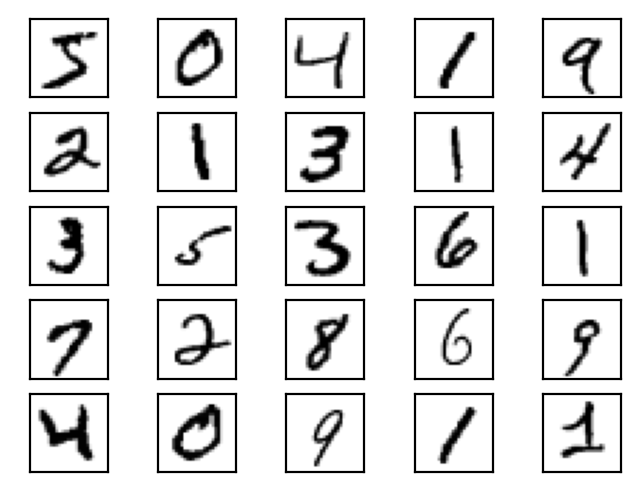

In [9]:
# display first 25 original MNIST training images 
class_names = np.arange(0, 10)

plt.figure()
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
#     plt.xlabel(class_names[train_labels[i]], size=4)
plt.show()

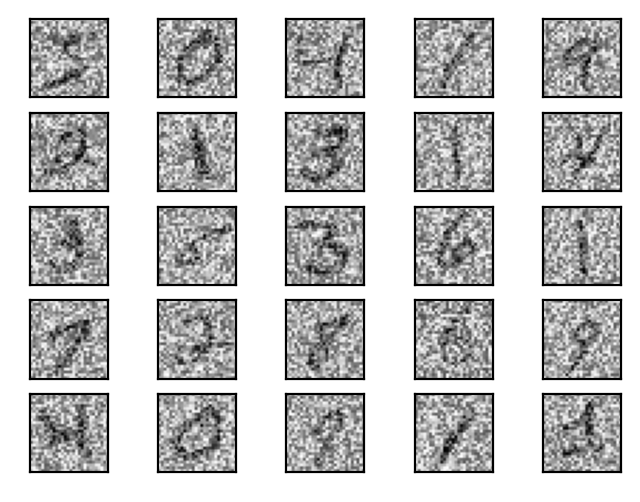

In [10]:
# display first 25 MNIST training images with added noise

plt.figure()
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_with_noise[i], cmap=plt.cm.binary)
#     plt.xlabel(class_names[train_labels[i]])
plt.show()

### Train Neural Network

We now train a neural network on the MNIST dataset in an attempt to obtain a test accuracy of 95% or higher. To do this, we create a simple sequential neural network which flattens the input images to a 1D array and consists of 128 hidden neurons and 10 output neurons. The activation function used in this neural network is the ReLU (Rectified Linear Unit) function. 

The model is then compiled with the loss function, optimizer and metrics specified, and then we fit this model to the original training images (with no added noise). 

In [11]:
# create a simple sequential model with 128 hidden neurons and 10 output neurons
# we also transform images from 2D array of 28*28 pixels to 1D array of 784 pixels
# and use a relu activation function

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), 
    keras.layers.Dense(25,activation='relu'),
    keras.layers.Dense(10)
])

In [12]:
# compile model and specify the loss function, optimizer and metrics used in monitoring the training
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
# fit the model to the provided original MNIST training images with 10 epochs
history=model.fit(train_images, train_labels,batch_size=100, epochs=10)

Epoch 1/10
600/600 [==============================] - 1s 2ms/step - loss: 0.4930 - accuracy: 0.8672
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2453 - accuracy: 0.9312
Epoch 3/10
600/600 [==============================] - 1s 1ms/step - loss: 0.2020 - accuracy: 0.9422
Epoch 4/10
600/600 [==============================] - 1s 1ms/step - loss: 0.1764 - accuracy: 0.9496
Epoch 5/10
600/600 [==============================] - 1s 1ms/step - loss: 0.1591 - accuracy: 0.9542
Epoch 6/10
600/600 [==============================] - 1s 1ms/step - loss: 0.1445 - accuracy: 0.9587
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1328 - accuracy: 0.9616
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1240 - accuracy: 0.9635
Epoch 9/10
600/600 [==============================] - 1s 1ms/step - loss: 0.1162 - accuracy: 0.9661
Epoch 10/10
600/600 [==============================] - 1s 1ms/step - loss: 0.1094 - accuracy: 0.9684

Clearly we are able to obtain good performance, with a final train accuracy after 10 epochs being ~97%. 

In [14]:
# output accuracy and loss of model evaluated with original MNIST test images 
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2) 

313/313 - 0s - loss: 0.1324 - accuracy: 0.9611


Correspondingly, we can evaluate the test accuracy and obtain a value of ~96% which is within the required criteria. 

### Test NN on different values of y_noise

Without retraining the network, we use this network to make a plot of test accuracy vs `y_noise` by running the repeatedly on the test dataset each time adding a differing noise contribution. 

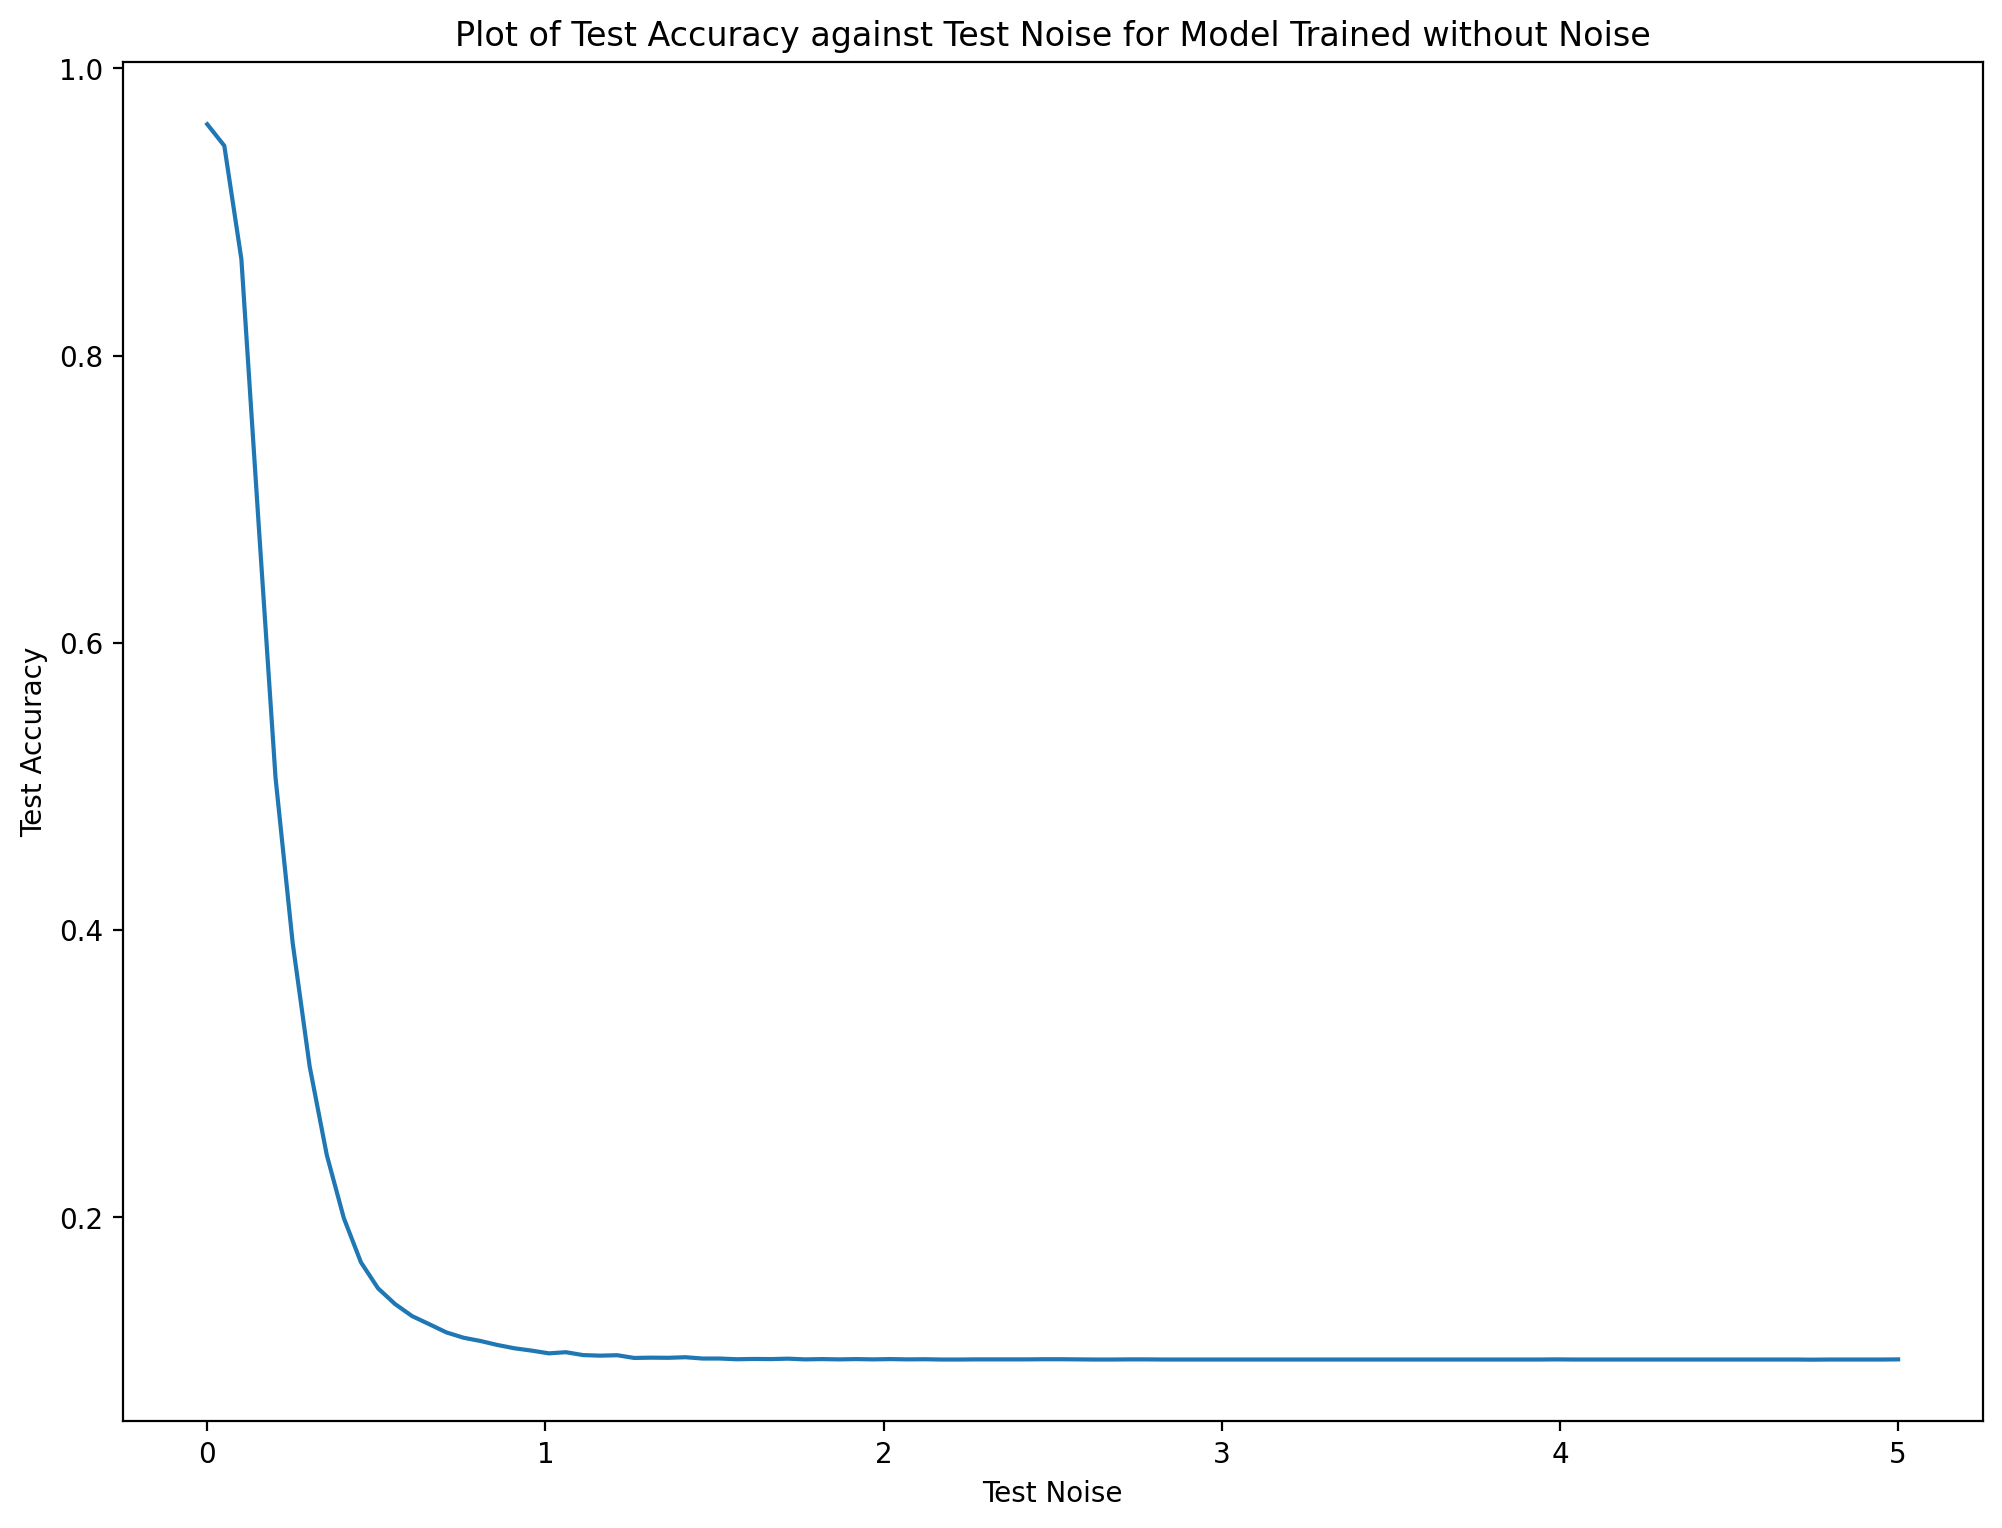

In [15]:
# create numpy array of max noise values for testing data between 0 and 5
test_noise = np.linspace(0,5,100)
# initialise empty list of model accuracy values
accuracy = []

# create new figure 
fig,ax=plt.subplots(figsize=(12,9))
# add axis labels and title 
ax.set_ylabel("Test Accuracy")
ax.set_xlabel("Test Noise")
ax.set_title('Plot of Test Accuracy against Test Noise for Model Trained without Noise')


# mapping in Python takes significantly longer for this specifc case, so we use simple for loop iteration
# test_images_with_noise =  np.asarray(list(map(lambda y: add_noise(test_images, y), y_noise)))

# iterate over values in test_noise 
for y in test_noise:
    # evaluate the model with the specified noise value and append the accuracy result to an array
    test_loss, test_acc = model.evaluate(add_noise(test_images, y), test_labels, verbose=0) 
    accuracy.append(test_acc)

# plot the test accuracy against test noise for the model trained without noise
ax.plot(test_noise, accuracy);

We can see from this plot that up to a test noise of ~0.5, the network is able to retain a good accuracy, however between 0.5 and 2, the accuracy drops significantly, eventually levelling off. This is unsuprising since the model was trained on data without noise, so we expect it to not perform as well with test images that have a significant level of noise. 

### Retrain NN with added noise 

Now we retrain the neural network using the training sample but with some level of noise added to the sample. To do so, we define a new function `train_with_noise` which adds noise to the training images using the `add_noise` function and then implements the `.fit` method to train/fit the model to these new noisy training images. 

In [18]:
def train_with_noise(noise):
    '''
    Implements the add_noise function to alter the maximum value of the uniform distribution 
    from which noise is added randomly to each pixel value of the images
    Fits a new model initialised above to the noisy training images 
    Inputs: 
        noise: max value of the noise to the added
    Outputs: 
        history: fitted model with the new noisy training data added to original MNIST images
    '''
#     # Create new model with same specifications as before
#     model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(28,28)), 
#     keras.layers.Dense(25,activation='relu'),
#     keras.layers.Dense(10)])
    # Compile model with same parameters as before
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              optimizer='adam',
              metrics=['accuracy'])
    # Create noisy training images
    train_images_with_noise = add_noise(train_images, noise) 
    # Fit model
    history = model.fit(train_images_with_noise, train_labels,batch_size=100, epochs=10, verbose=0) 

    return history

### Test retrained NN on different values of y_noise

Finally we can implement the function defined above to run the training of the model with the new noisy training images. We use a nested for loop to also vary the noise added to the testing images as done previously in the original model. We plot the Test Accuracy against Test Noise, with different line plots for the different noise added to the training images of the model. 

The range of noise values is between 0 and 3, as visually we can see that at around 2-3 the noise significantly distorts the image and thus we don't realistically expect images to be used that are more distorted than this. 

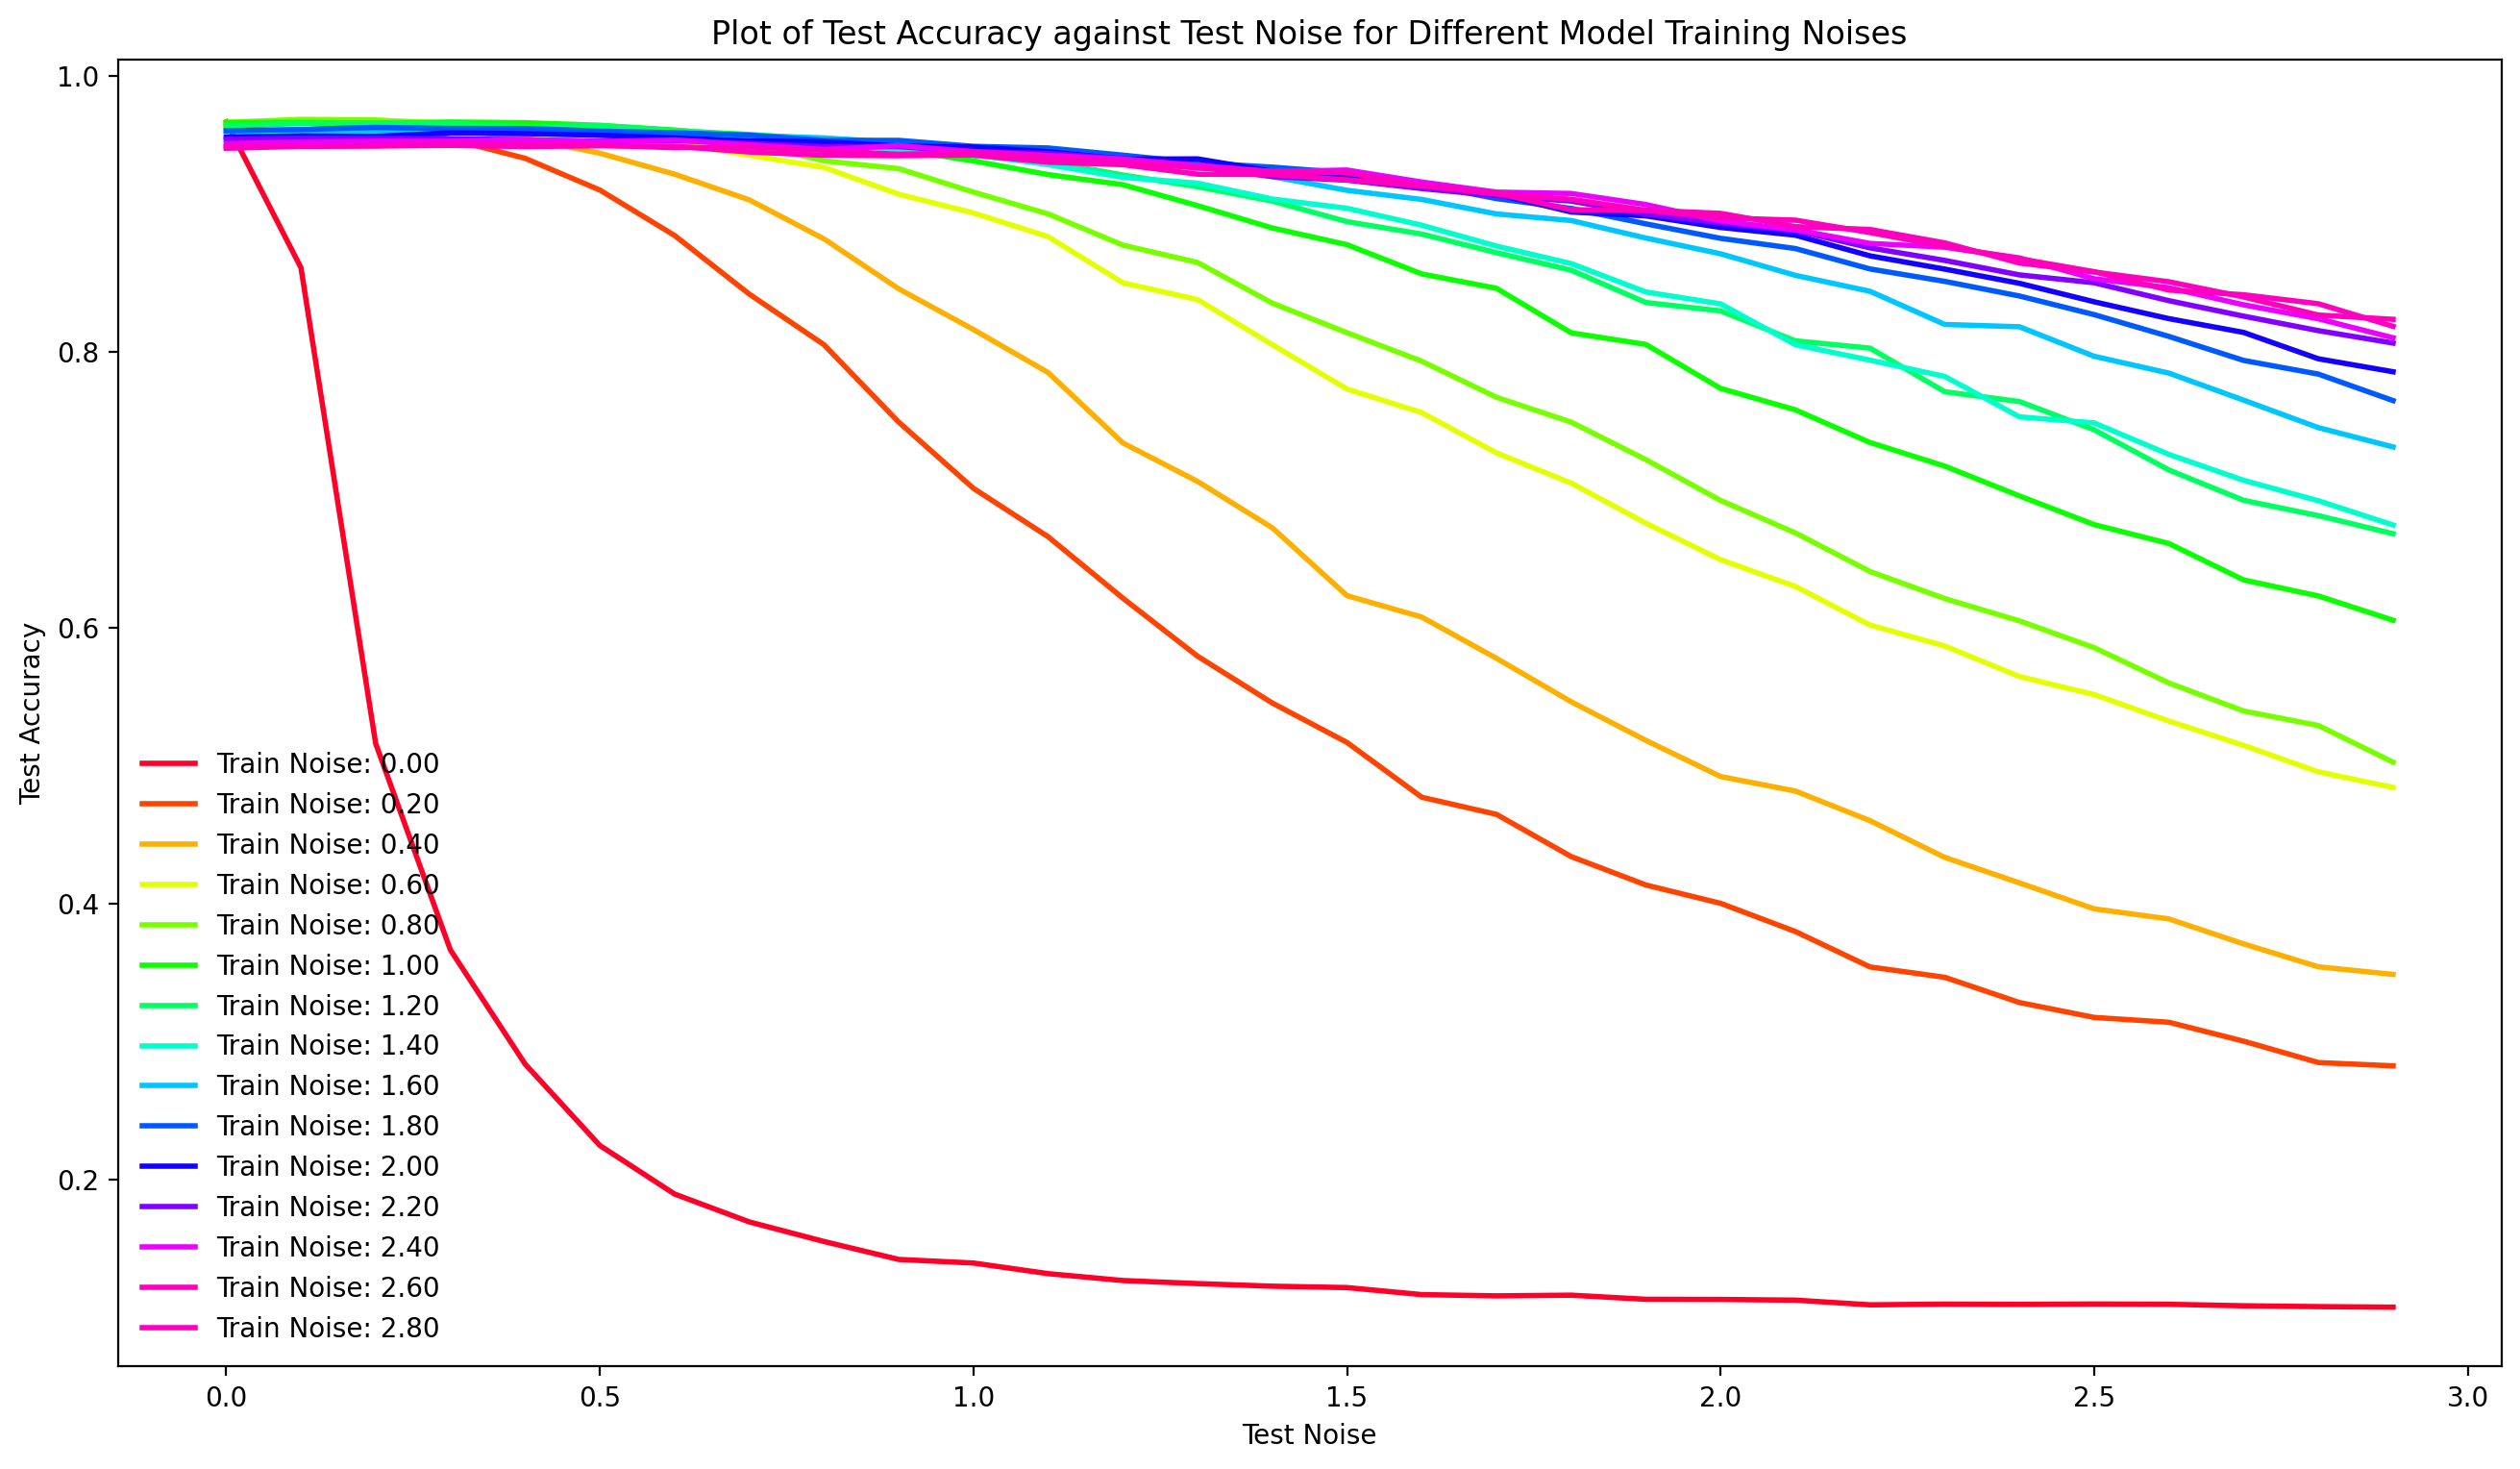

In [19]:
# initialise numpy arrays for range of noise added to training and testing images

train_noise = np.arange(0, 3 ,0.2) 
test_noise = np.arange(0, 3, 0.1)

# create new figure 
fig, ax = plt.subplots(figsize=(16,9)) 

# rainbow colormap to distinguish between different lines
cm = plt.get_cmap('gist_rainbow')
# create an array of required color values from colormap to be used in plotting
colors = cm(np.arange(0, len(test_noise))*20)

# nested for loop to iterate over each value in training and testing noise arrays
for count, noise in enumerate(train_noise):
    # obtain fitted model on specified noise
    history = train_with_noise(noise) 
    # initiate empty array to store accuracy of model on testing images
    test_accuracy = []

    for y in test_noise: 
        # add noise to testing images 
        noisy_test = add_noise(test_images, y)
        # evaluate model on noisy testing images
        test_loss, test_acc = model.evaluate(noisy_test, test_labels, verbose=0)
        # store accuracy value for current interation of noise to a list
        test_accuracy.append(test_acc)
    
    # plot test noise against test accuracy for current testing noise level        
    ax.plot(test_noise, test_accuracy, linewidth=2, label="Train Noise: {:.2f}".format(noise), color=colors[count])

    # add axis labels, title and legend to plot
    ax.set_xlabel("Test Noise")
    ax.set_ylabel("Test Accuracy")
    ax.set_title('Plot of Test Accuracy against Test Noise for Different Model Training Noises')
    ax.legend();

### Conclusion

**What is the best level of noise to add to your training dataset to maximise the performance?**

From the plot above we can see that the noise added to the training images significantly affects the accuracy of the model when evaluated with the noisy testing images. 

For low values of noise added to the test images, we see that the performance of the different models does not have much variation. However for higher values of test noise, there is much greater variation of the model performance. Generally we see that a higher level of training noise leads to better performance for test images that have a higher noise, as expected.

To choose a best level, we first need to determine the use case of the model.

If we consider the model will be used to classify reasonable well-defined images, such as those with a noise between 0 and 1, then a noise level of 1.0 would be best, since this model has a high accuracy in this range. However after a test noise of ~0.2, this model performs much more poorly, with an accuracy of ~75% towards the highest values of the test noise. 

However, if we consider the model will be used to classify images that have been taken in poor conditions leading to a much higher level of noise, then a training noise level of 2.2/2.4 would be considered to be more suitable, since this model performs reasonably well in the range of test noise from 0-1, and more importantly, it has one of the highest accuracies for the test noise in the range 1-3. 


**How would you define the performance?**

We define performance in this case as the test accuracy of each model. We consider an accuracy of > 95% to be very good, while an accuracy of > 80% is somewhat good. An accuracy lower than this is not considered a good model considering the applications of the model in banking and finance, where a single digit being classified wrong could have major consequences. A weighted average of accuracies over the range of testing noises for each model would be a much better indication of the performance for real-life applications, by determining which range of the test noise is given higher weighting and vice versaWe see that this definition of performance is a good indication for this type of data since we are concerned primarily with the classification of the image to the appropriate class/digit number. 